In [1]:
from engine import Tensor
import numpy as np
import nn
import torch

In [3]:
## Does it work in simple contexts?

xs = [
    [2.0, 3.0, -1.0],
    [3.0, -1.0, 0.5],
    [0.5, 1.0, 1.0],
    [1.0, 1.0, -1.0],
]

ys = [[1.0], 
      [-1.0], 
      [-1.0], 
      [1.0]]



net = nn.MLP()

optim = nn.SGD(net.parameters(), lr=0.005, momentum=0.9)

x = Tensor(xs)
y_real = Tensor(ys)

for k in range(10000):
    optim.zero_grad()
    y_pred = net(x)
    loss = ((y_pred - y_real)**2).mean(0)
    loss.backward()
    optim.step()
    if k % 200 == 0:
        print(k, loss.data)
    
y_pred

TypeError: MLP.__init__() missing 2 required positional arguments: 'n_in' and 'n_out'

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles


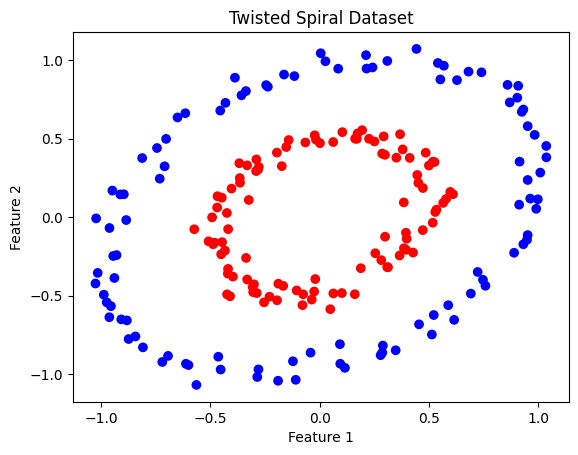

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

def generate_twisted_spiral(n_samples, noise=0.05, factor=0.5):
    """
    Generates a spiral dataset using the make_circles function from scikit-learn,
    then 'twists' it to resemble a spiral.
    :param n_samples: int, total number of points
    :param noise: float, standard deviation of Gaussian noise
    :param factor: float, scale factor between inner and outer circle
    :return: tuple, features (X) and labels (y)
    """
    X, y = make_circles(n_samples=n_samples, factor=factor, noise=noise, random_state=42)
    Y = y * 2 - 1  # Adjust labels to be -1 and 1

    # Apply a transformation to twist the circles into spirals
    transformation = np.array([[0.6, -0.6], [0.8, 0.8]])
    X = np.dot(X, transformation)

    return X, Y

# Generate the data
n_samples = 200
X, Y = generate_twisted_spiral(n_samples)

# Plotting the dataset
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.bwr)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Twisted Spiral Dataset")
plt.show()

# Convert the data for your neural network
xs = X.tolist()
ys = [[y] for y in Y.tolist()]


x = Tensor(xs)
y_real = Tensor(ys)

In [3]:
y_real.shape

(200, 1)

In [64]:
def kaiming_uniform(shape, gain=np.sqrt(2)):
    """
    Kaiming Uniform initialization (He initialization) for weight matrices.

    Args:
    shape (tuple): The shape of the weight matrix.
    gain (float): The scaling factor (recommended sqrt(2) for ReLU).

    Returns:
    numpy.ndarray: The initialized weights.
    """
    print(shape[:-1])
    fan_in = np.prod(shape[:-1])  # Product of dimensions except the last dimension
    std = gain / np.sqrt(fan_in)  # Calculate standard deviation
    limit = np.sqrt(3.0) * std  # Calculate limit for uniform distribution

    return np.random.uniform(-limit, limit, size=shape)

In [65]:
kaiming_uniform((1, 30)).std()

(1,)


1.3609795497380417

In [58]:
div = 1. / np.sqrt(1)

np.random.uniform(-div, div, (30, 1)).std()

0.5480296227365216

In [42]:
def kaiming_uniform_np(in_features, out_features):
    tensor = torch.empty(out_features, in_features)
    torch.nn.init.kaiming_uniform_(tensor, a=0)
    return tensor

kaiming_uniform_np(1, 30).std()

tensor(1.3837)

In [24]:
Tensor.kaiming_uniform(1, 30).data.std()

2.0763154

In [45]:
torch.nn.Linear(1, 30).weight.data.std()

tensor(0.6320)

In [2]:
import torch

In [4]:
import nn

iters = 10000
t_tensor_mean = 0
t_tensor_std = 0

n_tensor_mean = 0
n_tensor_std = 0
def kaiming_uniform_np(in_features, out_features):
    tensor = torch.empty(out_features, in_features)
    torch.nn.init.kaiming_uniform_(tensor, a=np.sqrt(5))
    return tensor

for _ in range(iters):
    t_tensor = kaiming_uniform_np(1, 30)
    # print(t_tensor.weight.data.shape)
    t_tensor_mean += torch.mean(t_tensor)
    t_tensor_std += torch.std(t_tensor)

    n_tensor = nn.Tensor.kaiming_uniform(1, 30, gain=np.sqrt(5))
    n_tensor_mean += np.mean(n_tensor.data)
    n_tensor_std += np.std(n_tensor.data)


print("Torch Mean:", t_tensor_mean/iters)
print("Torch STD:", t_tensor_std/iters)
print("Nano Mean:", n_tensor_mean/iters)
print("Nano STD:", n_tensor_std/iters)

Torch Mean: tensor(-0.0006)
Torch STD: tensor(0.5743)
Nano Mean: -0.0005825150759923418
Nano STD: 1.3842784321546555


In [3]:
import numpy as np

import torch
import nn

iters = 10000
t_tensor_mean = 0
t_tensor_std = 0

n_tensor_mean = 0
n_tensor_std = 0


for _ in range(iters):
    t_tensor = torch.nn.Linear(1, 30)
    # print(t_tensor.weight.data.shape)
    t_tensor = t_tensor.weight.data
    t_tensor_mean += torch.mean(t_tensor)
    t_tensor_std += torch.std(t_tensor)

    n_tensor = nn.Linear(1, 30)
    # print(n_tensor.weight.data.shape)
    n_tensor = n_tensor.weight.data
    n_tensor_mean += np.mean(n_tensor)
    n_tensor_std += np.std(n_tensor)


print("Torch Mean:", t_tensor_mean/iters)
print("Torch STD:", t_tensor_std/iters)
print("Nano Mean:", n_tensor_mean/iters)
print("Nano STD:", n_tensor_std/iters)

Torch Mean: tensor(0.0008)
Torch STD: tensor(0.5752)
Nano Mean: 0.00017077836060962
Nano STD: 0.5655065567523241


In [22]:
import nn
from engine import Tensor
# Generate the data
n_samples = 200
X, Y = generate_twisted_spiral(n_samples)

import time
class MLP(nn.Module):
    def __init__(self):
        self.fc1 = nn.Linear(2, 2048)
        self.fc2 = nn.Linear(2048, 2048) # Second hidden layer, 64 neurons
        self.output = nn.Linear(2048, 1) # Output layer, 1 output value

    def __call__(self, x):
        x = self.fc1(x).relu()
        x = self.fc2(x).relu()
        x = self.output(x)
        return x

model = MLP()
optim = nn.SGD(model.parameters(), lr=0.001, momentum=0.9)

x = Tensor(xs)
y_real = Tensor(ys)

epochs = 500
start_time = time.time() 
for epoch in range(epochs):
    y_pred = model(x)
    # print(y_pred.shape)
    loss = ((y_pred - y_real)**2).mean(0)

    optim.zero_grad()
    loss.backward()
    optim.step()
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.data}')
end_time = time.time()  # Record the end time
elapsed_time = end_time - start_time  # Calculate the elapsed time   

print(elapsed_time)

Epoch [10/500], Loss: [0.9043065]
Epoch [20/500], Loss: [0.88691926]
Epoch [30/500], Loss: [0.8417909]
Epoch [40/500], Loss: [0.8080156]
Epoch [50/500], Loss: [0.77428126]
Epoch [60/500], Loss: [0.7417346]
Epoch [70/500], Loss: [0.71063554]
Epoch [80/500], Loss: [0.6804763]
Epoch [90/500], Loss: [0.6513868]
Epoch [100/500], Loss: [0.6232545]
Epoch [110/500], Loss: [0.59604764]
Epoch [120/500], Loss: [0.5697253]
Epoch [130/500], Loss: [0.5442672]
Epoch [140/500], Loss: [0.5196318]
Epoch [150/500], Loss: [0.49579734]
Epoch [160/500], Loss: [0.47271916]
Epoch [170/500], Loss: [0.45043838]
Epoch [180/500], Loss: [0.42887914]
Epoch [190/500], Loss: [0.4080606]
Epoch [200/500], Loss: [0.38794506]
Epoch [210/500], Loss: [0.36855006]
Epoch [220/500], Loss: [0.34986869]
Epoch [230/500], Loss: [0.33186984]
Epoch [240/500], Loss: [0.3145343]
Epoch [250/500], Loss: [0.29783612]
Epoch [260/500], Loss: [0.28177968]
Epoch [270/500], Loss: [0.26636237]
Epoch [280/500], Loss: [0.2515601]
Epoch [290/500

In [77]:
a = np.random.randn(200, 1)
b = np.random.randn(1, 1)
out = a + b
print(out.shape)

b_grad = np.zeros_like(a)
np.sum((b_grad + np.ones_like(out)), axis=(b_grad.ndim - 1))

(200, 1)


array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [52]:
np.ones_like(out.shape)

array([1, 1])

In [87]:

# Batch = 100, 64 neurons -> 2 output neurons
a = np.random.randn(100, 64)
W = np.random.randn(64, 2)
# Bias init: (1, 2): this is how I am representing it in my framework
b = np.random.randn(1, 2)


out = ((a @ W) + b)

# Fake backprop to update grad of b
b_grad = np.ones_like(b)
out_grad = np.ones_like(out)

# Out_grad needs to be summed I think due to broadcasting rules, but by what dim?
b_grad += out_grad

ValueError: non-broadcastable output operand with shape (1,2) doesn't match the broadcast shape (100,2)

In [95]:
np.array([[1, 2]]).squeeze()

array([1, 2])

In [92]:
# Fake backprop to update grad of b
b_grad = np.ones_like(b)
out_grad = np.ones_like(out)
b_grad += np.sum(out_grad, axis=0)
b_grad

array([[101., 101.]])

In [21]:
import torch
import torch.nn as nn
import torch.optim as optim
grads = []
# Define the neural network architecture
class SimpleMLP(nn.Module):
    def __init__(self):
        super(SimpleMLP, self).__init__()
        self.fc1 = nn.Linear(2, 2048)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(2048, 2048)
        self.output = nn.Linear(2048, 1)

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.output(x)
        return x

# Initialize the network
net = SimpleMLP()

# Loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

# Example training loop
def train(model, criterion, optimizer, x_train, y_train, epochs=100):
    model.train()
    start_time = time.time() 
    for epoch in range(epochs):
        inputs = torch.tensor(x_train, dtype=torch.float32)
        targets = torch.tensor(y_train, dtype=torch.float32)

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, targets)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (epoch+1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')
    end_time = time.time()
    diff = end_time - start_time
    print(diff)

# Assuming you have `xs` and `ys` from your dataset
train(net, criterion, optimizer, xs, ys, epochs=500)
# plt.plot(np.arange(0, len(grads), 1), grads)

Epoch [10/500], Loss: 0.8886
Epoch [20/500], Loss: 0.6719
Epoch [30/500], Loss: 0.4978
Epoch [40/500], Loss: 0.3581
Epoch [50/500], Loss: 0.2455
Epoch [60/500], Loss: 0.1591
Epoch [70/500], Loss: 0.0994
Epoch [80/500], Loss: 0.0640
Epoch [90/500], Loss: 0.0465
Epoch [100/500], Loss: 0.0393
Epoch [110/500], Loss: 0.0368
Epoch [120/500], Loss: 0.0358
Epoch [130/500], Loss: 0.0354
Epoch [140/500], Loss: 0.0350
Epoch [150/500], Loss: 0.0347
Epoch [160/500], Loss: 0.0345
Epoch [170/500], Loss: 0.0342
Epoch [180/500], Loss: 0.0340
Epoch [190/500], Loss: 0.0338
Epoch [200/500], Loss: 0.0336
Epoch [210/500], Loss: 0.0335
Epoch [220/500], Loss: 0.0333
Epoch [230/500], Loss: 0.0332
Epoch [240/500], Loss: 0.0331
Epoch [250/500], Loss: 0.0329
Epoch [260/500], Loss: 0.0328
Epoch [270/500], Loss: 0.0327
Epoch [280/500], Loss: 0.0326
Epoch [290/500], Loss: 0.0325
Epoch [300/500], Loss: 0.0325
Epoch [310/500], Loss: 0.0324
Epoch [320/500], Loss: 0.0323
Epoch [330/500], Loss: 0.0322
Epoch [340/500], Lo

In [98]:
np.array(1).ndim

0

In [99]:
np.array([1]).ndim

1

In [101]:
np.random.randn(2, 2) + np.array(2)

array([[-0.94926597,  1.06477516],
       [ 1.32329603,  2.74751492]])

In [107]:
x = np.ones((2, 3))
y = np.ones((3,))

def _reduce_grad(grad, target_shape):
    """
    Reduces the gradient to match the target shape by summing along the appropriate axes.
    """
    print(grad)
    # Determine the axes to sum over
    reduction_axes = tuple(i for i in range(len(grad.shape)) if i >= len(target_shape) or grad.shape[i] != target_shape[i])
    print(reduction_axes)
    # Sum over the reduction axes
    if reduction_axes:
        grad = np.sum(grad, axis=reduction_axes, keepdims=True)
    
    # Squeeze extra dimensions if any
    grad = np.squeeze(grad)
    if grad.size != np.prod(target_shape):
        grad = np.tile(grad, int(np.prod(target_shape) / grad.size))
    grad = grad.reshape(target_shape)
    
    return grad

print(_reduce_grad(x, y.shape))
print("Expected output", [2., 2., 2.])

[[1. 1. 1.]
 [1. 1. 1.]]
(0, 1)
[6. 6. 6.]
Expected output [2.0, 2.0, 2.0]


array([[1., 1., 1.],
       [1., 1., 1.]])

In [120]:
x = np.random.randn(1, 4, 1)
x

array([[[-0.57677302],
        [-0.5171647 ],
        [-0.08820715],
        [-0.36198236]]])

In [118]:
x.squeeze().shape

(4,)

In [ ]:
[2, 2, 2, 2]

In [127]:
a = np.arange(0, 60, 1).reshape(3, 4, 5)

In [128]:
a

array([[[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14],
        [15, 16, 17, 18, 19]],

       [[20, 21, 22, 23, 24],
        [25, 26, 27, 28, 29],
        [30, 31, 32, 33, 34],
        [35, 36, 37, 38, 39]],

       [[40, 41, 42, 43, 44],
        [45, 46, 47, 48, 49],
        [50, 51, 52, 53, 54],
        [55, 56, 57, 58, 59]]])

In [133]:
a.sum(2)

array([[ 10,  35,  60,  85],
       [110, 135, 160, 185],
       [210, 235, 260, 285]])

In [33]:
class JankTensor:
    def __init__(self, shape):
        self.shape = shape
        self.data = [1] * (shape[0] * shape[1])
        self.strides = (shape[1], 1)  # For a 2D tensor, (rows_stride, cols_stride)

    def __getitem__(self, indices):
        row, col = indices
        index = row * self.strides[0] + col * self.strides[1]
        return self.data[index]

    def __setitem__(self, indices, value):
        row, col = indices
        index = row * self.strides[0] + col * self.strides[1]
        self.data[index] = value

    def __str__(self):
        result = ""
        for i in range(self.shape[0]):
            row = [self[i, j] for j in range(self.shape[1])]
            result += ' '.join(map(str, row)) + "\n"
        return result

# Create a 10x10 tensor
tensor = JankTensor((10, 10))
for i in range(10):
    for j in range(10):
        tensor[i, j] = i * 10 + j + 1
print(tensor)
print(tensor[1, 1])

1 2 3 4 5 6 7 8 9 10
11 12 13 14 15 16 17 18 19 20
21 22 23 24 25 26 27 28 29 30
31 32 33 34 35 36 37 38 39 40
41 42 43 44 45 46 47 48 49 50
51 52 53 54 55 56 57 58 59 60
61 62 63 64 65 66 67 68 69 70
71 72 73 74 75 76 77 78 79 80
81 82 83 84 85 86 87 88 89 90
91 92 93 94 95 96 97 98 99 100

12


In [34]:
tensor.shape[1]

10

In [49]:
data = [1, 2, 3, 4, 5, 
        6, 7, 8, 9, 10]

shape = (2, 5)
stride = (5, 1)


row = 1
col = 0

data[row * stride[0] + col * stride[1]]

6

In [53]:
y = np.array([1, 2, 3, 4])
y_pred = np.array([1, 2, 3, 4])

np.mean((y - y_pred)**2) + kl

0.0

In [62]:
x = [1, 1, 1, 2, 3, 4, 5]

In [66]:
sum = 0
for i in range(len(x)):
    sum += x[i]
sum/len(x)

2.4285714285714284

In [71]:
np.sum(x)/len(x)

2.4285714285714284

In [78]:
np.std(x)

1.498298354528788

In [77]:
import random
vals = []
for i in range(10000):
    vals.append(random.choices(x))
np.mean(vals)

2.4468

In [81]:
np.mean(x)

2.4285714285714284

In [82]:
import random
vals = []
for i in range(10000):
    vals.append(np.random.normal(np.mean(x), np.std(x)))
np.mean(vals)

2.422449350085162

In [83]:
import matplotlib.pyplot as plt

# xs = np.arange(-5, 10, 0.1)


plt.bar(vals)

TypeError: bar() missing 1 required positional argument: 'height'

In [98]:
import torch.nn as nn


class AutoEncoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Linear(10, 20),
            nn.ReLU(),
            nn.Linear(20, 10),
            nn.ReLU(),
            nn.Linear(10, 5),
            nn.ReLU(),
            nn.Linear(5, 5),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(5, 10),
            nn.ReLU(),
            nn.Linear(10, 20),
            nn.ReLU(),
            nn.Linear(20, 10), 
        )
    def forward(self, x):
        z = self.encoder(x)
        y_hat = self.decoder(z)
        return y_hat

In [101]:
x = torch.randn(20, 10)

model = AutoEncoder()
loss_fn = torch.nn.MSELoss()
optim = torch.optim.Adam(model.parameters(), lr=0.001)

for i in range(10000):
    optim.zero_grad()
    pred = model(x)
    loss = loss_fn(pred, x)
    print(loss.item())
    loss.backward()
    optim.step()
    

1.0316884517669678
1.0294970273971558
1.0273618698120117
1.0252643823623657
1.0232043266296387
1.0211840867996216
1.0192065238952637
1.0172673463821411
1.015364170074463
1.0134968757629395
1.0116688013076782
1.0098751783370972
1.0081095695495605
1.006371021270752
1.004673719406128
1.0030136108398438
1.0013930797576904
0.999756932258606
0.9981032013893127
0.9964473247528076
0.9948040246963501
0.9931724071502686
0.9915443658828735
0.9900184869766235
0.988573431968689
0.9871148467063904
0.9856414198875427
0.9841393232345581
0.9826130867004395
0.9810638427734375
0.9795034527778625
0.9779357314109802
0.9763663411140442
0.9747813940048218
0.9731563329696655
0.9714835286140442
0.9697837233543396
0.9681244492530823
0.9665130376815796
0.9649925827980042
0.9634451866149902
0.9618816375732422
0.9603040814399719
0.9587293267250061
0.9571259021759033
0.9554597735404968
0.9537542462348938
0.9520103335380554
0.9501773118972778
0.9483148455619812
0.9465174078941345
0.9446779489517212
0.942821264266967

In [103]:
pred = model(x)
np.mean(x - pred)

TypeError: mean() received an invalid combination of arguments - got (out=NoneType, dtype=NoneType, axis=NoneType, ), but expected one of:
 * (*, torch.dtype dtype)
 * (tuple of ints dim, bool keepdim, *, torch.dtype dtype)
 * (tuple of names dim, bool keepdim, *, torch.dtype dtype)


In [107]:
from torchvision import datasets